In [2]:
import numpy as np
import pandas as pd
from pandas import Series, DataFrame
import matplotlib.pyplot as plt

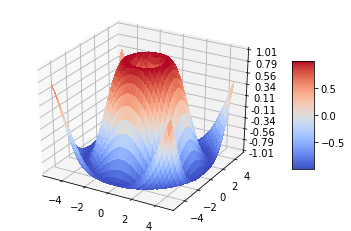

In [3]:
# This import registers the 3D projection, but is otherwise unused.
from mpl_toolkits.mplot3d import Axes3D  # noqa: F401 unused import

import matplotlib.pyplot as plt
from matplotlib import cm
from matplotlib.ticker import LinearLocator, FormatStrFormatter
import numpy as np


fig = plt.figure()
ax = fig.gca(projection='3d')

# Make data.
X = np.arange(-5, 5, 0.25)
Y = np.arange(-5, 5, 0.25)
X, Y = np.meshgrid(X, Y)
R = np.sqrt(X**2 + Y**2)
Z = np.sin(R)

# Plot the surface.
surf = ax.plot_surface(X, Y, Z, cmap=cm.coolwarm,
                       linewidth=0, antialiased=False)

# Customize the z axis.
ax.set_zlim(-1.01, 1.01)
ax.zaxis.set_major_locator(LinearLocator(10))
ax.zaxis.set_major_formatter(FormatStrFormatter('%.02f'))

# Add a color bar which maps values to colors.
fig.colorbar(surf, shrink=0.5, aspect=5)

plt.show()

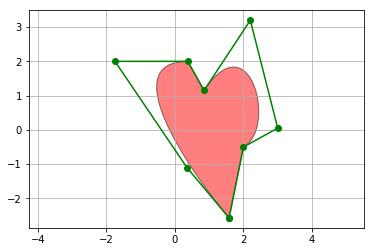

In [4]:
import matplotlib.path as mpath
import matplotlib.patches as mpatches
import matplotlib.pyplot as plt


fig, ax = plt.subplots()

Path = mpath.Path
path_data = [
    (Path.MOVETO, (1.58, -2.57)),
    (Path.CURVE4, (0.35, -1.1)),
    (Path.CURVE4, (-1.75, 2.0)),
    (Path.CURVE4, (0.375, 2.0)),
    (Path.LINETO, (0.85, 1.15)),
    (Path.CURVE4, (2.2, 3.2)),
    (Path.CURVE4, (3, 0.05)),
    (Path.CURVE4, (2.0, -0.5)),
    (Path.CLOSEPOLY, (1.58, -2.57)),
    ]
codes, verts = zip(*path_data)
path = mpath.Path(verts, codes)
patch = mpatches.PathPatch(path, facecolor='r', alpha=0.5)
ax.add_patch(patch)

# plot control points and connecting lines
x, y = zip(*path.vertices)
line, = ax.plot(x, y, 'go-')

ax.grid()
ax.axis('equal')
plt.show()

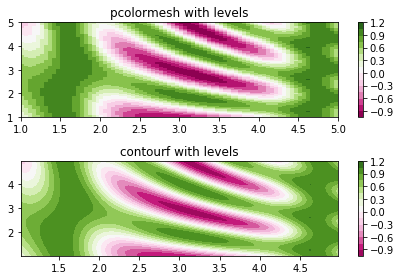

In [5]:
import matplotlib
import matplotlib.pyplot as plt
from matplotlib.colors import BoundaryNorm
from matplotlib.ticker import MaxNLocator
import numpy as np


# make these smaller to increase the resolution
dx, dy = 0.05, 0.05

# generate 2 2d grids for the x & y bounds
y, x = np.mgrid[slice(1, 5 + dy, dy),
                slice(1, 5 + dx, dx)]

z = np.sin(x)**10 + np.cos(10 + y*x) * np.cos(x)

# x and y are bounds, so z should be the value *inside* those bounds.
# Therefore, remove the last value from the z array.
z = z[:-1, :-1]
levels = MaxNLocator(nbins=15).tick_values(z.min(), z.max())


# pick the desired colormap, sensible levels, and define a normalization
# instance which takes data values and translates those into levels.
cmap = plt.get_cmap('PiYG')
norm = BoundaryNorm(levels, ncolors=cmap.N, clip=True)

fig, (ax0, ax1) = plt.subplots(nrows=2)

im = ax0.pcolormesh(x, y, z, cmap=cmap, norm=norm)
fig.colorbar(im, ax=ax0)
ax0.set_title('pcolormesh with levels')


# contours are *point* based plots, so convert our bound into point
# centers
cf = ax1.contourf(x[:-1, :-1] + dx/2.,
                  y[:-1, :-1] + dy/2., z, levels=levels,
                  cmap=cmap)
fig.colorbar(cf, ax=ax1)
ax1.set_title('contourf with levels')

# adjust spacing between subplots so `ax1` title and `ax0` tick labels
# don't overlap
fig.tight_layout()

plt.show()

In [10]:
import numpy as np
import matplotlib.cm as cm
import matplotlib.pyplot as plt
import matplotlib.cbook as cbook
from matplotlib.path import Path
from matplotlib.patches import PathPatch

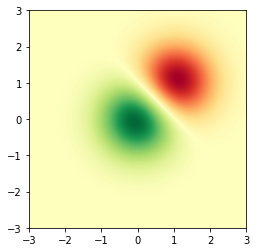

In [11]:
delta = 0.025
x = y = np.arange(-3.0, 3.0, delta)
X, Y = np.meshgrid(x, y)
Z1 = np.exp(-X**2 - Y**2)
Z2 = np.exp(-(X - 1)**2 - (Y - 1)**2)
Z = (Z1 - Z2) * 2

fig, ax = plt.subplots()
im = ax.imshow(Z, interpolation='bilinear', cmap=cm.RdYlGn,
               origin='lower', extent=[-3, 3, -3, 3],
               vmax=abs(Z).max(), vmin=-abs(Z).max())

plt.show()

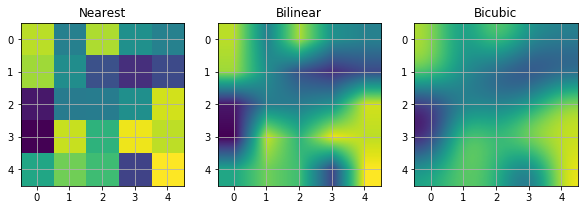

In [14]:
A = np.random.rand(5, 5)

fig, axs = plt.subplots(1, 3, figsize=(10, 3))
for ax, interp in zip(axs, ['nearest', 'bilinear', 'bicubic']):
    ax.imshow(A, interpolation=interp)
    ax.set_title(interp.capitalize())
    ax.grid(True)

plt.show()

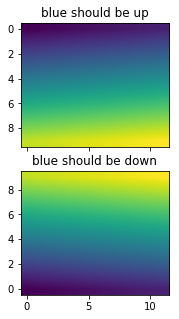

In [15]:
x = np.arange(120).reshape((10, 12))

interp = 'bilinear'
fig, axs = plt.subplots(nrows=2, sharex=True, figsize=(3, 5))
axs[0].set_title('blue should be up')
axs[0].imshow(x, origin='upper', interpolation=interp)

axs[1].set_title('blue should be down')
axs[1].imshow(x, origin='lower', interpolation=interp)
plt.show()

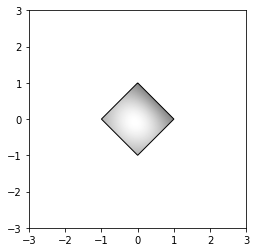

In [16]:
delta = 0.025
x = y = np.arange(-3.0, 3.0, delta)
X, Y = np.meshgrid(x, y)
Z1 = np.exp(-X**2 - Y**2)
Z2 = np.exp(-(X - 1)**2 - (Y - 1)**2)
Z = (Z1 - Z2) * 2

path = Path([[0, 1], [1, 0], [0, -1], [-1, 0], [0, 1]])
patch = PathPatch(path, facecolor='none')

fig, ax = plt.subplots()
ax.add_patch(patch)

im = ax.imshow(Z, interpolation='bilinear', cmap=cm.gray,
               origin='lower', extent=[-3, 3, -3, 3],
               clip_path=patch, clip_on=True)
im.set_clip_path(patch)

plt.show()

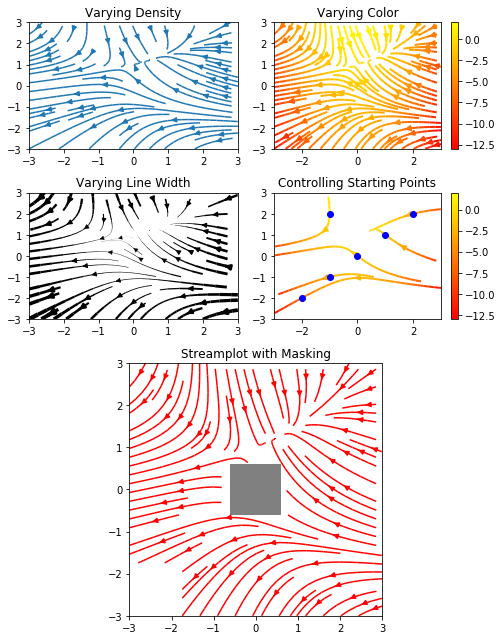

In [17]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec

w = 3
Y, X = np.mgrid[-w:w:100j, -w:w:100j]
U = -1 - X**2 + Y
V = 1 + X - Y**2
speed = np.sqrt(U**2 + V**2)

fig = plt.figure(figsize=(7, 9))
gs = gridspec.GridSpec(nrows=3, ncols=2, height_ratios=[1, 1, 2])

#  Varying density along a streamline
ax0 = fig.add_subplot(gs[0, 0])
ax0.streamplot(X, Y, U, V, density=[0.5, 1])
ax0.set_title('Varying Density')

# Varying color along a streamline
ax1 = fig.add_subplot(gs[0, 1])
strm = ax1.streamplot(X, Y, U, V, color=U, linewidth=2, cmap='autumn')
fig.colorbar(strm.lines)
ax1.set_title('Varying Color')

#  Varying line width along a streamline
ax2 = fig.add_subplot(gs[1, 0])
lw = 5*speed / speed.max()
ax2.streamplot(X, Y, U, V, density=0.6, color='k', linewidth=lw)
ax2.set_title('Varying Line Width')

# Controlling the starting points of the streamlines
seed_points = np.array([[-2, -1, 0, 1, 2, -1], [-2, -1,  0, 1, 2, 2]])

ax3 = fig.add_subplot(gs[1, 1])
strm = ax3.streamplot(X, Y, U, V, color=U, linewidth=2,
                     cmap='autumn', start_points=seed_points.T)
fig.colorbar(strm.lines)
ax3.set_title('Controlling Starting Points')

# Displaying the starting points with blue symbols.
ax3.plot(seed_points[0], seed_points[1], 'bo')
ax3.set(xlim=(-w, w), ylim=(-w, w))

# Create a mask
mask = np.zeros(U.shape, dtype=bool)
mask[40:60, 40:60] = True
U[:20, :20] = np.nan
U = np.ma.array(U, mask=mask)

ax4 = fig.add_subplot(gs[2:, :])
ax4.streamplot(X, Y, U, V, color='r')
ax4.set_title('Streamplot with Masking')

ax4.imshow(~mask, extent=(-w, w, -w, w), alpha=0.5,
          interpolation='nearest', cmap='gray', aspect='auto')
ax4.set_aspect('equal')

plt.tight_layout()
plt.show()

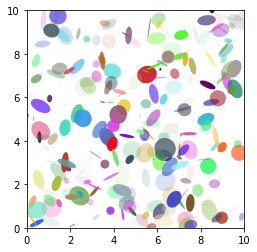

In [18]:
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.patches import Ellipse

NUM = 250

ells = [Ellipse(xy=np.random.rand(2) * 10,
                width=np.random.rand(), height=np.random.rand(),
                angle=np.random.rand() * 360)
        for i in range(NUM)]

fig, ax = plt.subplots(subplot_kw={'aspect': 'equal'})
for e in ells:
    ax.add_artist(e)
    e.set_clip_box(ax.bbox)
    e.set_alpha(np.random.rand())
    e.set_facecolor(np.random.rand(3))

ax.set_xlim(0, 10)
ax.set_ylim(0, 10)

plt.show()

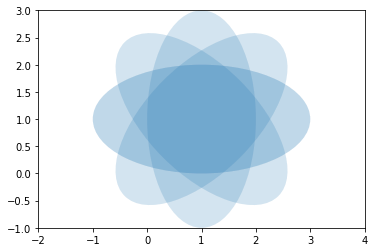

In [19]:
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.patches import Ellipse

delta = 45.0  # degrees

angles = np.arange(0, 360 + delta, delta)
ells = [Ellipse((1, 1), 4, 2, a) for a in angles]

a = plt.subplot(111, aspect='equal')

for e in ells:
    e.set_clip_box(a.bbox)
    e.set_alpha(0.1)
    a.add_artist(e)

plt.xlim(-2, 4)
plt.ylim(-1, 3)

plt.show()

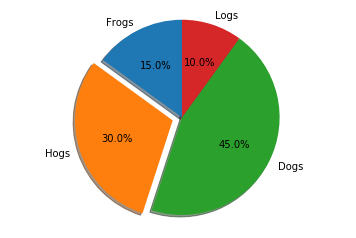

In [20]:
import matplotlib.pyplot as plt

# Pie chart, where the slices will be ordered and plotted counter-clockwise:
labels = 'Frogs', 'Hogs', 'Dogs', 'Logs'
sizes = [15, 30, 45, 10]
explode = (0, 0.1, 0, 0)  # only "explode" the 2nd slice (i.e. 'Hogs')

fig1, ax1 = plt.subplots()
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.show()

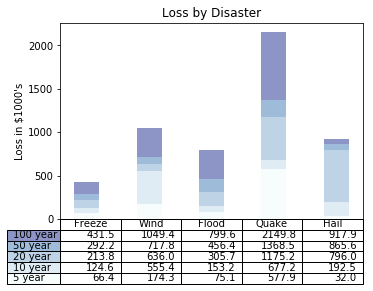

In [21]:
import numpy as np
import matplotlib.pyplot as plt


data = [[ 66386, 174296,  75131, 577908,  32015],
        [ 58230, 381139,  78045,  99308, 160454],
        [ 89135,  80552, 152558, 497981, 603535],
        [ 78415,  81858, 150656, 193263,  69638],
        [139361, 331509, 343164, 781380,  52269]]

columns = ('Freeze', 'Wind', 'Flood', 'Quake', 'Hail')
rows = ['%d year' % x for x in (100, 50, 20, 10, 5)]

values = np.arange(0, 2500, 500)
value_increment = 1000

# Get some pastel shades for the colors
colors = plt.cm.BuPu(np.linspace(0, 0.5, len(rows)))
n_rows = len(data)

index = np.arange(len(columns)) + 0.3
bar_width = 0.4

# Initialize the vertical-offset for the stacked bar chart.
y_offset = np.zeros(len(columns))

# Plot bars and create text labels for the table
cell_text = []
for row in range(n_rows):
    plt.bar(index, data[row], bar_width, bottom=y_offset, color=colors[row])
    y_offset = y_offset + data[row]
    cell_text.append(['%1.1f' % (x / 1000.0) for x in y_offset])
# Reverse colors and text labels to display the last value at the top.
colors = colors[::-1]
cell_text.reverse()

# Add a table at the bottom of the axes
the_table = plt.table(cellText=cell_text,
                      rowLabels=rows,
                      rowColours=colors,
                      colLabels=columns,
                      loc='bottom')

# Adjust layout to make room for the table:
plt.subplots_adjust(left=0.2, bottom=0.2)

plt.ylabel("Loss in ${0}'s".format(value_increment))
plt.yticks(values * value_increment, ['%d' % val for val in values])
plt.xticks([])
plt.title('Loss by Disaster')

plt.show()

In [24]:
import numpy as np
import matplotlib.pyplot as plt


def koch_snowflake(order, scale=10):
    """
    Return two lists x, y of point coordinates of the Koch snowflake.

    Arguments
    ---------
    order : int
        The recursion depth.
    scale : float
        The extent of the snowflake (edge length of the base triangle).
    """
    def _koch_snowflake_complex(order):
        if order == 0:
            # initial triangle
            angles = np.array([0, 120, 240]) + 90
            return scale / np.sqrt(3) * np.exp(np.deg2rad(angles) * 1j)
        else:
            ZR = 0.5 - 0.5j * np.sqrt(3) / 3

            p1 = _koch_snowflake_complex(order - 1)  # start points
            p2 = np.roll(p1, shift=-1)  # end points
            dp = p2 - p1  # connection vectors

            new_points = np.empty(len(p1) * 4, dtype=np.complex128)
            new_points[::4] = p1
            new_points[1::4] = p1 + dp / 3
            new_points[2::4] = p1 + dp * ZR
            new_points[3::4] = p1 + dp / 3 * 2
            return new_points

    points = _koch_snowflake_complex(order)
    x, y = points.real, points.imag
    return x, y

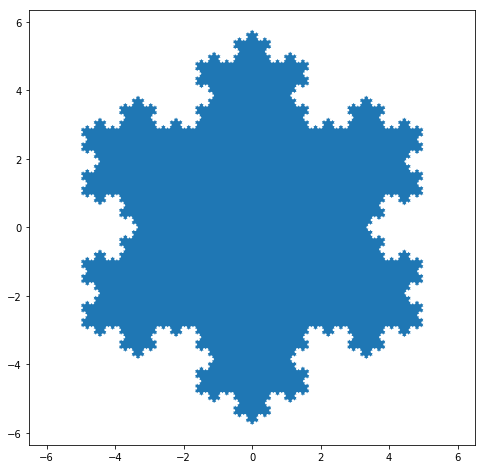

In [25]:
x, y = koch_snowflake(order=5)

plt.figure(figsize=(8, 8))
plt.axis('equal')
plt.fill(x, y)
plt.show()

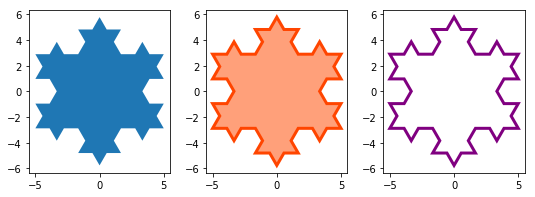

In [26]:
x, y = koch_snowflake(order=2)

fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(9, 3),
                                    subplot_kw={'aspect': 'equal'})
ax1.fill(x, y)
ax2.fill(x, y, facecolor='lightsalmon', edgecolor='orangered', linewidth=3)
ax3.fill(x, y, facecolor='none', edgecolor='purple', linewidth=3)

plt.show()

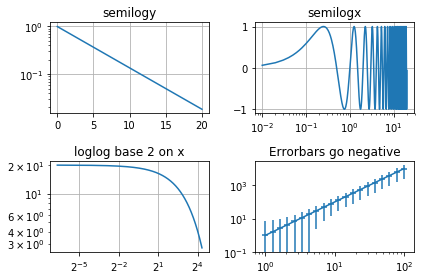

In [28]:
import numpy as np
import matplotlib.pyplot as plt

# Data for plotting
t = np.arange(0.01, 20.0, 0.01)

# Create figure
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2)

# log y axis
ax1.semilogy(t, np.exp(-t / 5.0))
ax1.set(title='semilogy')
ax1.grid()

# log x axis
ax2.semilogx(t, np.sin(2 * np.pi * t))
ax2.set(title='semilogx')
ax2.grid()

# log x and y axis
ax3.loglog(t, 20 * np.exp(-t / 10.0), basex=2)
ax3.set(title='loglog base 2 on x')
ax3.grid()

# With errorbars: clip non-positive values
# Use new data for plotting
x = 10.0**np.linspace(0.0, 2.0, 20)
y = x**2.0

ax4.set_xscale("log", nonposx='clip')
ax4.set_yscale("log", nonposy='clip')
ax4.set(title='Errorbars go negative')
ax4.errorbar(x, y, xerr=0.1 * x, yerr=5.0 + 0.75 * y)
# ylim must be set after errorbar to allow errorbar to autoscale limits
ax4.set_ylim(bottom=0.1)

fig.tight_layout()
plt.show()

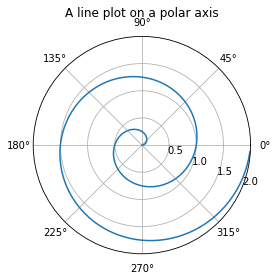

In [29]:
import numpy as np
import matplotlib.pyplot as plt


r = np.arange(0, 2, 0.01)
theta = 2 * np.pi * r

ax = plt.subplot(111, projection='polar')
ax.plot(theta, r)
ax.set_rmax(2)
ax.set_rticks([0.5, 1, 1.5, 2])  # Less radial ticks
ax.set_rlabel_position(-22.5)  # Move radial labels away from plotted line
ax.grid(True)

ax.set_title("A line plot on a polar axis", va='bottom')
plt.show()

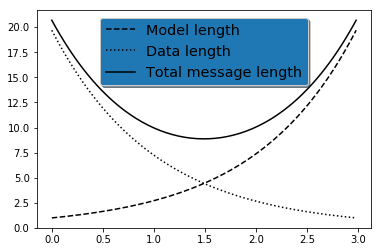

In [30]:
import numpy as np
import matplotlib.pyplot as plt

# Make some fake data.
a = b = np.arange(0, 3, .02)
c = np.exp(a)
d = c[::-1]

# Create plots with pre-defined labels.
fig, ax = plt.subplots()
ax.plot(a, c, 'k--', label='Model length')
ax.plot(a, d, 'k:', label='Data length')
ax.plot(a, c + d, 'k', label='Total message length')

legend = ax.legend(loc='upper center', shadow=True, fontsize='x-large')

# Put a nicer background color on the legend.
legend.get_frame().set_facecolor('C0')

plt.show()


0 $W^{3\beta}_{\delta_1 \rho_1 \sigma_2} = U^{3\beta}_{\delta_1 \rho_1} + \frac{1}{8 \pi 2} \int^{\alpha_2}_{\alpha_2} d \alpha^\prime_2 \left[\frac{ U^{2\beta}_{\delta_1 \rho_1} - \alpha^\prime_2U^{1\beta}_{\rho_1 \sigma_2} }{U^{0\beta}_{\rho_1 \sigma_2}}\right]$
1 $\alpha_i > \beta_i,\ \alpha_{i+1}^j = {\rm sin}(2\pi f_j t_i) e^{-5 t_i/\tau},\ \ldots$
2 $\frac{3}{4},\ \binom{3}{4},\ \genfrac{}{}{0}{}{3}{4},\ \left(\frac{5 - \frac{1}{x}}{4}\right),\ \ldots$
3 $\sqrt{2},\ \sqrt[3]{x},\ \ldots$
4 $\mathrm{Roman}\ , \ \mathit{Italic}\ , \ \mathtt{Typewriter} \ \mathrm{or}\ \mathcal{CALLIGRAPHY}$
5 $\acute a,\ \bar a,\ \breve a,\ \dot a,\ \ddot a, \ \grave a, \ \hat a,\ \tilde a,\ \vec a,\ \widehat{xyz},\ \widetilde{xyz},\ \ldots$
6 $\alpha,\ \beta,\ \chi,\ \delta,\ \lambda,\ \mu,\ \Delta,\ \Gamma,\ \Omega,\ \Phi,\ \Pi,\ \Upsilon,\ \nabla,\ \aleph,\ \beth,\ \daleth,\ \gimel,\ \ldots$
7 $\coprod,\ \int,\ \oint,\ \prod,\ \sum,\ \log,\ \sin,\ \approx,\ \oplus,\ \star,\ \varpropto,\ \infty,\ 

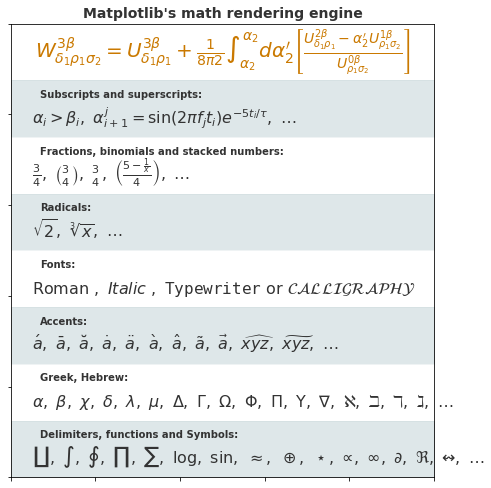

In [31]:
import matplotlib.pyplot as plt
import subprocess
import sys
import re

# Selection of features following "Writing mathematical expressions" tutorial
mathtext_titles = {
    0: "Header demo",
    1: "Subscripts and superscripts",
    2: "Fractions, binomials and stacked numbers",
    3: "Radicals",
    4: "Fonts",
    5: "Accents",
    6: "Greek, Hebrew",
    7: "Delimiters, functions and Symbols"}
n_lines = len(mathtext_titles)

# Randomly picked examples
mathext_demos = {
    0: r"$W^{3\beta}_{\delta_1 \rho_1 \sigma_2} = "
    r"U^{3\beta}_{\delta_1 \rho_1} + \frac{1}{8 \pi 2} "
    r"\int^{\alpha_2}_{\alpha_2} d \alpha^\prime_2 \left[\frac{ "
    r"U^{2\beta}_{\delta_1 \rho_1} - \alpha^\prime_2U^{1\beta}_"
    r"{\rho_1 \sigma_2} }{U^{0\beta}_{\rho_1 \sigma_2}}\right]$",

    1: r"$\alpha_i > \beta_i,\ "
    r"\alpha_{i+1}^j = {\rm sin}(2\pi f_j t_i) e^{-5 t_i/\tau},\ "
    r"\ldots$",

    2: r"$\frac{3}{4},\ \binom{3}{4},\ \genfrac{}{}{0}{}{3}{4},\ "
    r"\left(\frac{5 - \frac{1}{x}}{4}\right),\ \ldots$",

    3: r"$\sqrt{2},\ \sqrt[3]{x},\ \ldots$",

    4: r"$\mathrm{Roman}\ , \ \mathit{Italic}\ , \ \mathtt{Typewriter} \ "
    r"\mathrm{or}\ \mathcal{CALLIGRAPHY}$",

    5: r"$\acute a,\ \bar a,\ \breve a,\ \dot a,\ \ddot a, \ \grave a, \ "
    r"\hat a,\ \tilde a,\ \vec a,\ \widehat{xyz},\ \widetilde{xyz},\ "
    r"\ldots$",

    6: r"$\alpha,\ \beta,\ \chi,\ \delta,\ \lambda,\ \mu,\ "
    r"\Delta,\ \Gamma,\ \Omega,\ \Phi,\ \Pi,\ \Upsilon,\ \nabla,\ "
    r"\aleph,\ \beth,\ \daleth,\ \gimel,\ \ldots$",

    7: r"$\coprod,\ \int,\ \oint,\ \prod,\ \sum,\ "
    r"\log,\ \sin,\ \approx,\ \oplus,\ \star,\ \varpropto,\ "
    r"\infty,\ \partial,\ \Re,\ \leftrightsquigarrow, \ \ldots$"}


def doall():
    # Colors used in mpl online documentation.
    mpl_blue_rvb = (191. / 255., 209. / 256., 212. / 255.)
    mpl_orange_rvb = (202. / 255., 121. / 256., 0. / 255.)
    mpl_grey_rvb = (51. / 255., 51. / 255., 51. / 255.)

    # Creating figure and axis.
    plt.figure(figsize=(6, 7))
    plt.axes([0.01, 0.01, 0.98, 0.90], facecolor="white", frameon=True)
    plt.gca().set_xlim(0., 1.)
    plt.gca().set_ylim(0., 1.)
    plt.gca().set_title("Matplotlib's math rendering engine",
                        color=mpl_grey_rvb, fontsize=14, weight='bold')
    plt.gca().set_xticklabels("", visible=False)
    plt.gca().set_yticklabels("", visible=False)

    # Gap between lines in axes coords
    line_axesfrac = (1. / (n_lines))

    # Plotting header demonstration formula
    full_demo = mathext_demos[0]
    plt.annotate(full_demo,
                 xy=(0.5, 1. - 0.59 * line_axesfrac),
                 color=mpl_orange_rvb, ha='center', fontsize=20)

    # Plotting features demonstration formulae
    for i_line in range(1, n_lines):
        baseline = 1 - (i_line) * line_axesfrac
        baseline_next = baseline - line_axesfrac
        title = mathtext_titles[i_line] + ":"
        fill_color = ['white', mpl_blue_rvb][i_line % 2]
        plt.fill_between([0., 1.], [baseline, baseline],
                         [baseline_next, baseline_next],
                         color=fill_color, alpha=0.5)
        plt.annotate(title,
                     xy=(0.07, baseline - 0.3 * line_axesfrac),
                     color=mpl_grey_rvb, weight='bold')
        demo = mathext_demos[i_line]
        plt.annotate(demo,
                     xy=(0.05, baseline - 0.75 * line_axesfrac),
                     color=mpl_grey_rvb, fontsize=16)

    for i in range(n_lines):
        s = mathext_demos[i]
        print(i, s)
    plt.show()


if '--latex' in sys.argv:
    # Run: python mathtext_examples.py --latex
    # Need amsmath and amssymb packages.
    fd = open("mathtext_examples.ltx", "w")
    fd.write("\\documentclass{article}\n")
    fd.write("\\usepackage{amsmath, amssymb}\n")
    fd.write("\\begin{document}\n")
    fd.write("\\begin{enumerate}\n")

    for i in range(n_lines):
        s = mathext_demos[i]
        s = re.sub(r"(?<!\\)\$", "$$", s)
        fd.write("\\item %s\n" % s)

    fd.write("\\end{enumerate}\n")
    fd.write("\\end{document}\n")
    fd.close()

    subprocess.call(["pdflatex", "mathtext_examples.ltx"])
else:
    doall()